<a href="https://colab.research.google.com/github/TerryTian21/PyTorch-Practice/blob/main/Vegetable_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [14]:
# Check for GPU
!nvidia-smi

Wed Nov 15 02:19:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     8W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu118


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Increase model complexity - Adding more layers, increasing number of hidden units. Essentially giving model more opportunities to learn
2. Train for more epochs
3. Use feature crosses (feature engineering) or reduce regularization parameter
4. Incrase the quality and quanity of train data

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

The dataset we will be using is letter classification from https://raw.githubusercontent.com/MachineLearningBCAM/Datasets/main/data/multi_class_datasets/letter-recognition.csv

In [16]:
!pip install -q kaggle

In [17]:
!mkdir ~./kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
! kaggle datasets download misrakahmed/vegetable-image-dataset

100% 534M/534M [00:27<00:00, 21.6MB/s]
100% 534M/534M [00:27<00:00, 20.1MB/s]


In [21]:
! unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [22]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [23]:
from pathlib import Path
datapath = Path("Vegetable Images/")

walk_through_dir(datapath)

There are 3 directories and 0 images in 'Vegetable Images'.
There are 15 directories and 0 images in 'Vegetable Images/test'.
There are 0 directories and 200 images in 'Vegetable Images/test/Radish'.
There are 0 directories and 200 images in 'Vegetable Images/test/Potato'.
There are 0 directories and 200 images in 'Vegetable Images/test/Pumpkin'.
There are 0 directories and 200 images in 'Vegetable Images/test/Tomato'.
There are 0 directories and 200 images in 'Vegetable Images/test/Cucumber'.
There are 0 directories and 200 images in 'Vegetable Images/test/Bottle_Gourd'.
There are 0 directories and 200 images in 'Vegetable Images/test/Bean'.
There are 0 directories and 200 images in 'Vegetable Images/test/Cauliflower'.
There are 0 directories and 200 images in 'Vegetable Images/test/Capsicum'.
There are 0 directories and 200 images in 'Vegetable Images/test/Papaya'.
There are 0 directories and 200 images in 'Vegetable Images/test/Cabbage'.
There are 0 directories and 200 images in 'Ve

In [24]:
# Setup train and testing paths
train_dir = datapath / "train"
test_dir = datapath / "test"

In [25]:
# Visualize an image

import random
from PIL import Image

image_path_list = list(datapath.glob("*/*/*.jpg"))
image_path_list[:3]

[PosixPath('Vegetable Images/test/Radish/1128.jpg'),
 PosixPath('Vegetable Images/test/Radish/1053.jpg'),
 PosixPath('Vegetable Images/test/Radish/1122.jpg')]

Bottle_Gourd
Height : 224
Width: 224


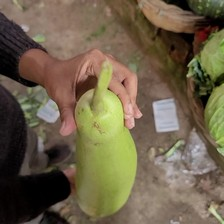

In [26]:
random_image = random.choice(image_path_list)

image_class = random_image.parent.stem

print(image_class)
img = Image.open(random_image)
print(f"Height : {img.height}")
print(f"Width: {img.width}")

img

(-0.5, 223.5, 223.5, -0.5)

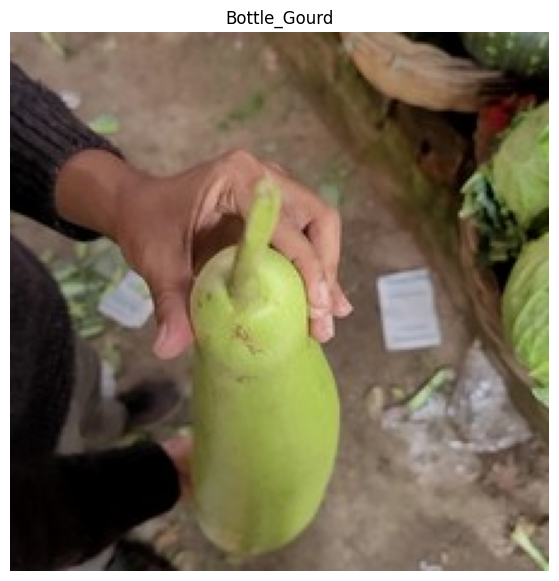

In [27]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

np_image = np.array(img)

plt.figure(figsize=(10,7))
plt.imshow(np_image)
plt.title(image_class)
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [28]:
# 3.1 Transforming data with torchvision.transforms
from torchvision.transforms import v2

In [29]:
np_image.shape

(224, 224, 3)

In [30]:
# Write transform for turning images into tensors

train_transformv0 = v2.Compose([v2.PILToTensor(),
                                v2.ToDtype(torch.float, scale=True),
                                v2.Resize(size=(64,64), antialias=None)
                              ])

train_transformv1 = v2.Compose([v2.PILToTensor(),
                              v2.ToDtype(torch.float, scale=True),
                              v2.TrivialAugmentWide(num_magnitude_bins=31),
                              ])

test_transform = v2.Compose([v2.PILToTensor(),
                             v2.ToDtype(torch.float, scale=True),
                             v2.Resize(size=(64,64), antialias=None)])

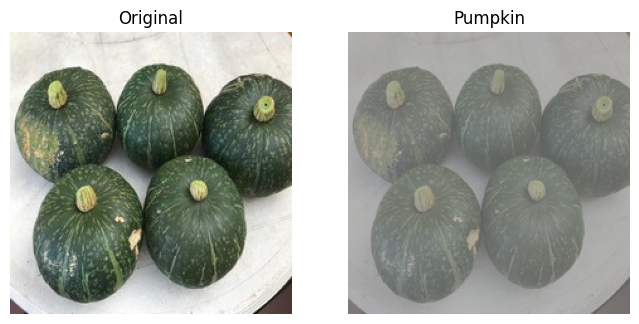

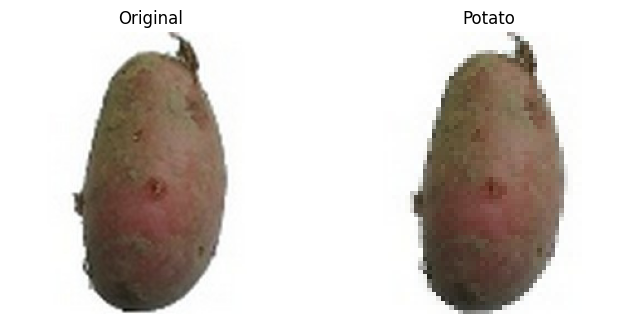

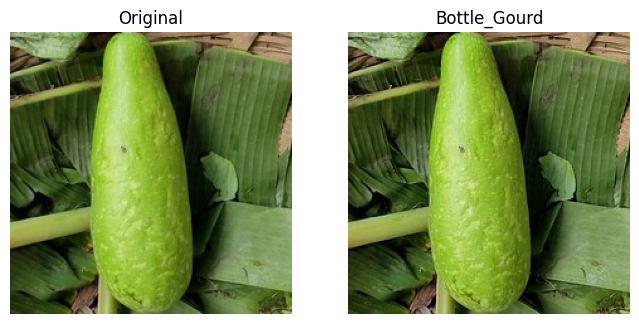

In [31]:
# Write a function to plot transformed images

def plot_images(image_path, n):
  """ Plots images against their transformed versions"""

  random_images = random.sample(image_path, n)
  for image in random_images:
    with Image.open(image) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
      ax[0].imshow(f)
      ax[0].set_title("Original")
      ax[0].axis(False)

      p = random.random()
      if p > 0.5:
        ax[1].imshow(train_transformv0(f).permute(1,2,0))
      else:
        ax[1].imshow(train_transformv1(f).permute(1,2,0))
      ax[1].set_title("Transformed")
      ax[1].axis(False)

      plt.title(image.parent.stem)

plot_images(image_path_list, 3)

### Load image data using `ImageFolder`

In [32]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = "./Vegetable Images/train/",
                          transform=train_transformv0,
                          )

test_data = ImageFolder(root = "./Vegetable Images/test/",
                        transform=test_transform)

In [33]:
# Get class names as a list
class_names = train_data.classes
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [34]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [35]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(15000, 3000)

In [36]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers =NUM_WORKERS,
                             shuffle=False)

In [37]:
# How many batches of images are in our data loaders?
print(len(train_dataloader), len(test_dataloader))

235 47


## Try Creating a TinyVGG Model architecture

In [38]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.layer_stack2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.classification = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10 * 16 * 16,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.layer_stack1(x)
    x = self.layer_stack2(x)
    return self.classification(x)

In [50]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
HIDDEN_UNITS = 10

model_0 = TinyVGG(input_shape = 3,
                  output_shape = len(class_names),
                  hidden_units = HIDDEN_UNITS).to(device)

## 4. Create training and testing functions for `model_0`.

In [48]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for (X,y) in dataloader:
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass

    y_logits = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_preds = y_logits.softmax(dim=1).argmax(dim=1)
    train_acc += ((y_preds == y).sum().item() / len(y_preds))

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss, train_acc = train_loss / len(dataloader), train_acc / len(dataloader)

  return train_loss, train_acc

In [49]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for (X,y) in dataloader:
      # Send data to target device
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      y_logits = model(X)

      # 2. Calculuate and accumulate loss
      test_loss += loss_fn(y_logits, y)

      # Calculate and accumulate accuracy
      y_preds = y_logits.softmax(dim=1).argmax(dim=1)
      test_acc += ((y_preds == y).sum().item() / len(y_preds))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss, test_acc = test_loss / len(dataloader), test_acc / len(dataloader)

  return test_loss, test_acc

In [42]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [43]:
# Try with a single input

batch, labels = next(iter(train_dataloader))

example = batch[0]
print(example.size())
example = example.unsqueeze(0)
print(example.size())
output = model_0(example.to(device))

print(output.size())
output_pred = output.softmax(dim=1).argmax(dim=1)
print(output_pred)
print(labels[0])

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])
torch.Size([1, 15])
tensor([7], device='cuda:0')
tensor(1)


In [44]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.3 MB/s eta 0:00:00


In [45]:
# Create accuracy function
from torchmetrics.classification import MulticlassAccuracy

accuracy_fn = MulticlassAccuracy(num_classes=len(class_names)).to(device)

In [46]:
print(len(class_names))

15


In [51]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer

start_time = timer()

results_m0_5ep = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       loss_fn=loss_fn,
                       optimizer=optimizer)
end_time = timer()

print(f"Time Taken: {end_time - start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9137 | train_acc: 0.3535 | test_loss: 1.1577 | test_acc: 0.6263
Epoch: 2 | train_loss: 1.0401 | train_acc: 0.6626 | test_loss: 0.8972 | test_acc: 0.7053
Epoch: 3 | train_loss: 0.8257 | train_acc: 0.7381 | test_loss: 0.7307 | test_acc: 0.7666
Epoch: 4 | train_loss: 0.6774 | train_acc: 0.7914 | test_loss: 0.6995 | test_acc: 0.7724
Epoch: 5 | train_loss: 0.5933 | train_acc: 0.8187 | test_loss: 0.5582 | test_acc: 0.8247
Time Taken: 140.2151838929999


In [179]:
import random

def get_predictions(model, test_dataloader, device):
  model.eval()
  predictions = []

  with torch.inference_mode():
    for (X,y) in test_dataloader:
      X, y = X.to(device), y.to(device)
      predictions.append(model(X).softmax(dim=1).argmax(dim=1))
  predictions = torch.cat(predictions, dim=0).cpu()
  return predictions

predictions = get_predictions(model_0, test_dataloader, device)


In [162]:
test_data[0][0]

tensor([[[0.3034, 0.1091, 0.2453,  ..., 0.1059, 0.0694, 0.0620],
         [0.1184, 0.3243, 0.1816,  ..., 0.0610, 0.1025, 0.0674],
         [0.1581, 0.1637, 0.1446,  ..., 0.0841, 0.0547, 0.0752],
         ...,
         [0.2150, 0.2355, 0.1711,  ..., 0.2407, 0.2711, 0.5341],
         [0.3953, 0.1797, 0.1799,  ..., 0.3985, 0.5733, 0.5750],
         [0.4468, 0.2801, 0.1581,  ..., 0.4983, 0.5858, 0.5694]],

        [[0.2515, 0.0669, 0.2159,  ..., 0.0782, 0.0826, 0.0662],
         [0.1319, 0.2814, 0.1110,  ..., 0.0527, 0.1020, 0.0674],
         [0.1130, 0.1581, 0.1635,  ..., 0.1206, 0.0525, 0.0748],
         ...,
         [0.2029, 0.2380, 0.1811,  ..., 0.2289, 0.2532, 0.5017],
         [0.3784, 0.1792, 0.1917,  ..., 0.3865, 0.5537, 0.5338],
         [0.4203, 0.2750, 0.1581,  ..., 0.4789, 0.5662, 0.5429]],

        [[0.2392, 0.0395, 0.1669,  ..., 0.0576, 0.0559, 0.0488],
         [0.0694, 0.2248, 0.0699,  ..., 0.0539, 0.0792, 0.0654],
         [0.1179, 0.1289, 0.1042,  ..., 0.0865, 0.0262, 0.

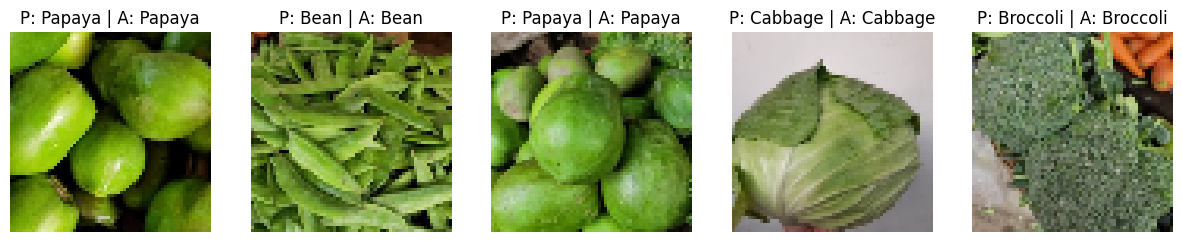

In [178]:

def plot_predictions(model, test_data, predictions, device):

  plt.figure(figsize=(15, 6))

  for i in range(5):
    random_index = random.randint(0, len(test_data))
    plt.subplot(1, 5, i+1)

    plt.imshow(test_data[random_index][0].permute(1,2,0))
    plt.title(f"P: {class_names[predictions[random_index]]} | A: {class_names[test_data.targets[random_index]]}")
    plt.axis(False)

plot_predictions(model_0, test_data, predictions, device)

In [181]:
results_m0_5ep["test_acc"]

[tensor(0.2353, device='cuda:0'),
 tensor(0.2546, device='cuda:0'),
 tensor(0.2867, device='cuda:0'),
 tensor(0.3209, device='cuda:0'),
 tensor(0.2507, device='cuda:0')]

In [207]:
print(predictions[:20])
print(test_data.targets[:20])

diff = [1 if ae != be else -1 for ae, be in zip(predictions, test_data.targets)]
print(diff.count(1))
print(diff.count(1) / len(predictions))

tensor([3, 0, 0, 8, 0, 0, 4, 0, 1, 0, 0, 0, 4, 0, 0, 0, 4, 9, 4, 0])
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
410
0.13666666666666666


In [236]:
X, y = next(iter(test_dataloader))

X, y = X.to(device), y.to(device)

outs = model_0(X).softmax(dim=1).argmax(dim=1)
acc = accuracy_fn(outs, y)

print(f"{outs} \n {y}")

print(acc)
arr = outs.cpu().numpy()
print(np.count_nonzero(arr == 0))
print(len(arr))

tensor([ 0,  0,  0,  6,  0,  0,  0,  0,  1,  0,  6,  0,  4,  0,  0,  0,  4,  0,
         1,  0,  0,  2,  0, 10,  1,  0,  0,  0, 10,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  2,  6,  0,  0,  0,  2,  5,  0,  1,  0,  0,  0,  0,  0,  0,
         3,  0,  0,  0, 10,  0,  0,  0,  0,  0], device='cuda:0') 
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor(0.0898, device='cuda:0')
46
64


In [254]:
from torchmetrics.classification import MulticlassAccuracy

accuracy_fn=MulticlassAccuracy(num_classes=2).to(device)

t1 = torch.Tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]).to(device)
t2 = torch.Tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).to(device)

print(accuracy_fn(t1, t2))

tensor(0.4722, device='cuda:0')


In [ ]:
# Train for 10 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Create model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,
                  output_shape = len(class_names),
                  hidden_units = HIDDEN_UNITS).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

start_time = timer()

results_m1_10ep = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       loss_fn=loss_fn,
                       optimizer=optimizer)

end_time = timer()

print(f"Time Taken: {end_time - start_time}")

In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(#TODO,
                             lr=0.001)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Try using the Resnet Model Architecture and compare the model results

In [ ]:
# Create model

In [ ]:
# Train Model

In [ ]:
# Compare Results

## 8. Make a prediction on your own custom image of a vegetable (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?